# Project Final Project Report

As a team passionate about making basketball predictions, we were trying to start from gaining data from different sources, processing data to build our models to make our final champion predictions for 64 teams. In our final project report, we will introduce the following five sections step by step:

1. Introduction and Data Description
2. Data Processing
3. Data Analysis
4. Summary of Findings
5. Citation

Each of these sections are necessary in the process of achieving our goal in predicting and simulating Final Results in 2018 NCAA Basketball Tournament.

## 1. Introduction and Data Description

NCAA Division I Men's Basketball Tournament is a single-elimination tournament played each Mid-March in the United States, currently featuring 68 college basketball teams from the Division I level of the National Collegiate Athletic Association (NCAA) which has approximately 350 teams, to determine the national championship. Our data includes:
* NCAA Regular Season Champion Team statistics from 2017-2018
* NCAA Regular Season Champion Player statistics from 2017-2018 
* 2018 NCAA Tournament Team Data
* Power 6 Conference Team Data
* Seed Data

Sources we gained data from:
* Merkle's first annual Bracket-lytics Challenge (2017-2018 Team & Player statistics)
* NCAA Division I Men's Basketball Tournament Official Website (Seed Data; Tournament Data)
* College Basketball website: Ranking the Power 6 Conferences (Power 6 Conference Team Data)

In order to do our data processing and data analysis part, we imported the following packages and setting dataframe view options for later use:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cross_validation import train_test_split
from sklearn import linear_model 
from sklearn import tree
from sklearn.svm import SVC   
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
from keras.optimizers import Adam
% matplotlib inline
pd.set_option('max_colwidth',200)
pd.set_option('display.max_columns', 500)
pd.set_option('max_info_columns', 500)

### 1.1 NCAA Regular Season Champion Team statistics from 2017-2018:
* Each row represents data for a single game 

* First half columns represent Home Team's performance
    * Team: University Competition Teams
    * MP:  Minutes Played
    * FG:  Field Goals Made
    * FGA: Field Goals Attempted
    * FG%: Field Goal Percentage
    * 2P:  2 Point Field Goals Made
    * 2PA: 2 Point Field Goals Attempted
    * 2P%: 2 Point Field Goal Percentage
    * 3P:  3 Point Field Goals Made
    * 3PA: 3 Point Field Goals Attempted
    * 3P%: 3 Point Field Goal Percentage
    * FT:  Free Throws Made
    * FTA: Free Throws Attempted
    * FT%: Free Throw Percentage
    * ORB: Offensive Rebounds
    * DRB: Defensive Rebounds
    * TRB: Total Rebounds
    * AST: Assists
    * STL: Steals
    * BLK: Blocks
    * TOV: Turnovers
    * PF:  Personal Fouls
    * PTS: Points Score
    
* Second half columns represent Away Team's performance
    * Opp FG: Opponents Field Goals Made
    * Opp FGA: Opponents Field Goals Attempted 
    * Opp FG%: Opponents Field Goal Percentage
    * Opp 2P:  Opponents 2 Point Field Goals Made
    * Opp 2PA: Opponents 2 Point Field Goals Attempted
    * Opp 2P%: Opponents 2 Point Field Goal Percentage 
    * Opp 3P:  Opponents 3 Point Field Goals Made
    * Opp 3PA: Opponents 3 Point Field Goals Attempted
    * Opp 3P%: Opponents 3 Point Field Goal Percentage
    * Opp FT:  Opponents Free Throws Made
    * Opp FTA: Opponents Free Throws Attempted 
    * Opp FT%: Opponents Free Throw Percentage
    * Opp ORB: Opponents Offensive Rebounds
    * Opp DRB: Opponents Defensive Rebounds
    * Opp TRB: Opponents Total Rebounds
    * Opp AST: Opponents Assists
    * Opp STL: Opponents Steals
    * Opp BLK: Opponents Blocks
    * Opp TOV: Opponents Turnovers
    * Opp PF:  Opponents Personal Fouls
    * Opp PTS: Opponents Points Scored
    
* gameid: Game Identifier
* Win? : Did the Team Win?

* For the first column "Unnamed:0", we would need to clean it in the data processing step.

In [3]:
# 2018 Team Statistics
df1 = pd.read_csv('2018TeamStats Final.csv')

In [24]:
df1.head(0)

,Unnamed: 0,Team,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Opp FG,Opp FGA,Opp FG%,Opp 2P,Opp 2PA,Opp 2P%,Opp 3P,Opp 3PA,Opp 3P%,Opp FT,Opp FTA,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,gameid,Win?


In [5]:
# 2017 Team Statistics
df3 = pd.read_csv('2017TeamStats Test.csv')

In [25]:
df3.head(0)

,Unnamed: 0,Team,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Opp FG,Opp FGA,Opp FG%,Opp 2P,Opp 2PA,Opp 2P%,Opp 3P,Opp 3PA,Opp 3P%,Opp FT,Opp FTA,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,gameid,Win?


### 1.2 NCAA Regular Season Champion Player statistics from 2017-2018
* Each row represents a basketball player
* Columns includes player and their performance data with belonging team:
    * player: Player Name
    * MP:  Minutes Played
    * FG:  Field Goals Made
    * FGA: Field Goals Attempted
    * FG%: Field Goal Percentage
    * 2P:  2 Point Field Goals Made
    * 2PA: 2 Point Field Goals Attempted
    * 2P%: 2 Point Field Goal Percentage
    * 3P:  3 Point Field Goals Made
    * 3PA: 3 Point Field Goals Attempted
    * 3P%: 3 Point Field Goal Percentage
    * FT:  Free Throws Made
    * FTA: Free Throws Attempted
    * FT%: Free Throw Percentage
    * ORB: Offensive Rebounds
    * DRB: Defensive Rebounds
    * TRB: Total Rebounds
    * AST: Assists
    * STL: Steals
    * BLK: Blocks
    * TOV: Turnovers
    * PF:  Personal Fouls
    * PTS: Points Score
    * Team: University Competition Teams
    * gameid: Game Identifier
* Player dataset and Team dataset connects with each other through the column "Team" and "gameid"

In [4]:
# 2018 Player Statistics
df2 = pd.read_csv('2018PlayerStats Final.csv')

In [22]:
df2.head(0)

,Unnamed: 0,player,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,gameid


In [6]:
# 2017 Player Statistics
df4 = pd.read_csv('2017PlayerStats Test.csv')

In [23]:
df4.head(0)

,Unnamed: 0,player,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,gameid


### 1.3. 2018 NCAA Tournament Team Data
* 64 Final Teams catogrized by geographical locations: South, West, East, Midwest
* This dataset will be used in our Data Processing and Data Analytics Step.
    * Identify whether the team of top 10 star players are in the list
    * Being used in made simulation prediction results

In [7]:
# 64 teams in 2018 tournament
south=['virginia','maryland-baltimore-county','Creighton','Kansas-State','Kentucky','Davidson','Arizona','Buffalo','miami-fl','loyola-il','Tennessee','Wright-State','Nevada','Texas','Cincinnati','Georgia-State']
west=['Xavier','Texas-Southern','Missouri','Florida-State','Ohio-State','South-Dakota-State','Gonzaga','north-carolina-greensboro','Houston','San-Diego-State','Michigan','Montana','texas-am','Providence','north-carolina-state','Lipscomb']
east=['Villanova','Radford','Virginia-Tech','Alabama','West-Virginia','Murray-State','Wichita-State','Marshall','Florida','st-bonaventure','Texas-Tech','stephen-f-austin','Arkansas','Butler','Purdue','Cal-State-Fullerton',]
midwest=['Kansas','pennsylvania','Seton-Hall','north-carolina-state','Clemson','New-Mexico-State','Auburn','college-of-charleston','texas-christian','Syracuse','Michigan-State','Bucknell','Rhode-Island','Oklahoma','Duke','iona']
south=[x.lower() for x in south]
west=[x.lower() for x in west]
east=[x.lower() for x in east]
midwest=[x.lower() for x in midwest]

### 1.4 Power 6 Conference Team Data
* Teams catogrized by Power 6 Conferences
* This dataset will be used in Feature Engineering step in Data Processing to add categorical features to our dataset

In [8]:
# Power 6 conferences
listACCteams = ['north-carolina','virginia','florida-state','louisville','notre-dame','syracuse','duke','virginia-tech','georgia-tech','miami','wake-forest','clemson','north-carolina-state','boston-college','pittsburgh']
listPac12teams = ['southern-california','arizona','oregon','ucla','california','utah','washington-state','stanford','arizona-state','colorado','washington','oregon-state']
listSECteams = ['mississippi','louisiana-state','kentucky','southern-california','florida','arkansas','alabama','tennessee','mississippi-state','georgia','vanderbilt','auburn','texas-am','missouri']
listBig10teams = ['maryland','wisconsin','purdue','northwestern','michigan-state','indiana','iowa','michigan','penn-state','nebraska','minnesota','illinois','ohio-state','rutgers']
listBig12teams = ['texas-christian','kansas','baylor','west-virginia','iowa-state','kansas-state','texas-tech','oklahoma-state','texas','oklahoma']
listBigEastteams = ['butler','creighton','dePaul','georgetown','marquette','providence','seton-hall','st-johns-ny','villanova','xavier']

### 1.5 Seed Data
* The seed datafile is obtained from NCAA which includes uniformed the team names.
* This dataset will be used in Feature Engineering step in Data Processing to add categorical features to our dataset

In [86]:
seed = pd.read_csv('2018_seeds.csv',names='r')
seed.head()

,r
0,Virginia
1,Villanova
2,Kansas
3,Xavier
4,North Carolina


## 2. Data Processing

In the data processing step, we performed following tasks to prepare our data for data analysis:
* Combine two years dataset (2017 and 2018) together for player and Team dataset respectively.
* Clean Players Dataset
* Clean Team Dataset 
* Feature Engineering
* Feature Transformation
* Modeling Preparation

The steps we did for data processing mainly includes cleaning and combing dataset, showing the data as average statistics. After getting final dataset, we added on new features and did feature transformation using differences between two teams as our new features. After feature transformation, we decided not do data normalizations since our data are evenly distributed. In the final step of data processing, we splited the whole dataset into traning dataset, validation dataset, and testing dataset.

### 2.1 Combine dataset between 2017 and 2018

In [26]:
df1=pd.concat([df1, df3])

In [27]:
df2=pd.concat([df2, df4])

### 2.2 Clean Players dataset
Usually people think key player can carry the whole team, but we find it's NOT true!
* We identified key players who are ranked on top of a single metric (E.g. points per game or 3P% )
* We then compared team of top 10 players with the list of 64 Final Teams
* BUT none of these player's team was able to get into the final rounds

We also tried a lot of other metrics, but none of the top players' teams are in final 64 list. Therefore, we cannot find the usefulness of the keyplayer data to our final champions' prediction so we decided not use Player dataset.

In [28]:
# show top 10 players and their teams using mean of highest points per game (PTS) for each player
top_player=df2[['player','Team','PTS']].groupby(['player','Team']).mean().sort_values(['PTS'], ascending=False).iloc[0:10]
top_player

,,PTS
player,Team,
DJ Hanes,nebraska-christian,39.00000
Jalen Adams,olivet,37.00000
Taylor Gilpin,johnson-university,32.00000
Keith Hayes,william-jewell,31.00000
George Brock,southern-new-orleans,31.00000
Denzel Famble,voorhees,30.00000
Brian Cameron,wesley,30.00000
Marcus Keene,central-michigan,29.96875
Rob Davis,fort-hays-state,29.00000


In [29]:
for x in top_player.reset_index()['Team']:
    if x in south+west+east+midwest:
        print ('yes in final 64')
    else:
        print ('not in final 64')

not in final 64
not in final 64
not in final 64
not in final 64
not in final 64
not in final 64
not in final 64
not in final 64
not in final 64
not in final 64


### 2.3 Clean Team Dataset
In the process of data processing, we did the following tasks:
* Checked columns to make sure there's no null values
    * We checked columns and headers for Team datasets to make sure the all the information is complete;
* Reset column index 
* Checked number of unique teams in combined Team dataset
    * Since the dataset includes duplicate team names, so we checked how many unique team names, game ids for different competition seasons in our datasets.
* Defined and applied function to drop teams with lower than 40 games played
    * Because the low occurrence of Team performance data does not contribute as much as other active teams to our final result. 
    * After this step we have 351 teams left instead of original 767 teams.
    
* Defined and applied function to drop games with lower than 2 records
    * We found some game ids are unmatched anymore after deleting the teams with low occurrence in the competition. 
    * It would only make sense when one game has two teams playing against each other, so we dropped 854 games without matched competitors.
    * After this step we have 21590 games left.

* Added Away Teams' name to the dataframe
    * We add the team name as “awayName” to our data frame according to matched gameid because we want to make it clear to our audience which two teams are playing again each other.
   
* Checked Maryland Winning Rate
    * As two of the students living and learning in Maryland, we have heard that Maryland basketball is a competitive basketaball team. Therefore, we checked the winning rate of the Team Maryland after combining two years' Team dataset out of interest. We found Team Maryland has a winning rate at near 65.6%. Proud of Maryland!

* Created dataset using average statistics of Teams
    * Dropped columns "Unnamed" "gameid" "Win?" 
    * Converted all objects in the dataframe to numeric
    * Grouped by Teams using average data for each metrics, keeping 2 decimal points
    * Set dataframe index to Team
    
After cleaning, we have **351 teams** and **21590 games** in our processed dataset.

#### 2.3.1 Checking columns of non-null values, data types

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23299 entries, 0 to 11931
Data columns (total 47 columns):
Unnamed: 0    23299 non-null object
Team          23299 non-null object
MP            23299 non-null object
FG            23299 non-null object
FGA           23299 non-null object
FG%           23299 non-null object
2P            23299 non-null object
2PA           23299 non-null object
2P%           23299 non-null object
3P            23299 non-null object
3PA           23299 non-null object
3P%           23299 non-null object
FT            23299 non-null object
FTA           23299 non-null object
FT%           23292 non-null object
ORB           23299 non-null object
DRB           23299 non-null object
TRB           23299 non-null object
AST           23299 non-null object
STL           23299 non-null object
BLK           23299 non-null object
TOV           23299 non-null object
PF            23299 non-null object
PTS           23299 non-null object
Opp FG        23299 non-nul

#### 2.3.2 Reset Index

In [49]:
df1=df1.reset_index(drop=True)
df1.head()

,Unnamed: 0,Team,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Opp FG,Opp FGA,Opp FG%,Opp 2P,Opp 2PA,Opp 2P%,Opp 3P,Opp 3PA,Opp 3P%,Opp FT,Opp FTA,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,gameid,Win?,awayName
0,2,canisius,200,25,52,0.481,17,31,0.548,8,21,0.381,17,19,0.895,6,23,29,13,4,6,18,20,75,30,73,0.411,23,49,0.469,7,24,0.292,13,20,0.65,17,19,36,9,8,2,12,22,80,111120171,0,buffalo
1,3,buffalo,200,30,73,0.411,23,49,0.469,7,24,0.292,13,20,0.65,17,19,36,9,8,2,12,22,80,25,52,0.481,17,31,0.548,8,21,0.381,17,19,0.895,6,23,29,13,4,6,18,20,75,111120171,1,canisius
2,4,pennsylvania,200,26,72,0.361,17,33,0.515,9,39,0.231,11,19,0.579,7,23,30,14,6,3,9,21,72,28,56,0.5,24,39,0.615,4,17,0.235,20,24,0.833,7,37,44,13,5,5,16,22,80,111120172,0,fairfield
3,5,fairfield,200,28,56,0.5,24,39,0.615,4,17,0.235,20,24,0.833,7,37,44,13,5,5,16,22,80,26,72,0.361,17,33,0.515,9,39,0.231,11,19,0.579,7,23,30,14,6,3,9,21,72,111120172,1,pennsylvania
4,6,illinois-state,200,33,65,0.508,19,36,0.528,14,29,0.483,7,16,0.438,3,19,22,24,3,5,11,26,87,32,65,0.492,25,42,0.595,7,23,0.304,27,37,0.73,13,30,43,16,9,5,11,16,98,111120173,0,florida-gulf-coast


#### 2.3.3 Check number of unique teams in combined Team dataset

In [33]:
len(df1.Team.unique())

767

#### 2.3.4 Define and apply function to drop teams with lower than 40 games played

In [36]:
# Defined function to drop teams with lower than certain games (x) played
def uselessTeam(x):
    b = [t for t in df1.Team.unique()if len(df1[df1.Team == t]) < x]
    print('Drop '+ str(len(b))+' teams')
    for x in b:
        df1.drop(df1[df1.Team == x].index.get_level_values(0), inplace=True)

In [37]:
# Decided to drop teams who involved in less than 40 games
uselessTeam(40)

Drop 416 teams


In [38]:
# Check number of unique teams left after deleting teams with less than 40 games
len(df1.Team.unique())

351

#### 2.3.5 Define and apply function to drop games with lower than 2 records

In [39]:
# Defined function to drop games with lower than certain records (x) 
def ignoreGames(x):
    b = [t for t in df1.gameid.unique()if len(df1[df1.gameid == t]) < x]
    print('Drop '+ str(len(b))+' games')
    for i in b:
            df1.drop(df1[df1.gameid == i].index.get_level_values(0), inplace=True)

In [40]:
# Decided to drop games which has less than 2 records
ignoreGames(2)

Drop 854 games


In [41]:
# Check number of games left after deleting games with less than 2 records
len(df1)

21590

#### 2.3.6 Add Away Teams' name to the dataframe

In [42]:
awayName=[]
for t, gameid in enumerate(df1.gameid):
    if t % 2 ==0:
        smalldf=df1[df1.gameid == gameid]
        a=str(smalldf.iloc[1][1])
        b=smalldf.iloc[0][1]
        awayName.append(a)
        awayName.append(b)
    else:
        None
df1['awayName']=awayName

In [43]:
df1.head()

,Unnamed: 0,Team,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Opp FG,Opp FGA,Opp FG%,Opp 2P,Opp 2PA,Opp 2P%,Opp 3P,Opp 3PA,Opp 3P%,Opp FT,Opp FTA,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,gameid,Win?,awayName
0,2,canisius,200,25,52,0.481,17,31,0.548,8,21,0.381,17,19,0.895,6,23,29,13,4,6,18,20,75,30,73,0.411,23,49,0.469,7,24,0.292,13,20,0.65,17,19,36,9,8,2,12,22,80,111120171,0,buffalo
1,3,buffalo,200,30,73,0.411,23,49,0.469,7,24,0.292,13,20,0.65,17,19,36,9,8,2,12,22,80,25,52,0.481,17,31,0.548,8,21,0.381,17,19,0.895,6,23,29,13,4,6,18,20,75,111120171,1,canisius
2,4,pennsylvania,200,26,72,0.361,17,33,0.515,9,39,0.231,11,19,0.579,7,23,30,14,6,3,9,21,72,28,56,0.5,24,39,0.615,4,17,0.235,20,24,0.833,7,37,44,13,5,5,16,22,80,111120172,0,fairfield
3,5,fairfield,200,28,56,0.5,24,39,0.615,4,17,0.235,20,24,0.833,7,37,44,13,5,5,16,22,80,26,72,0.361,17,33,0.515,9,39,0.231,11,19,0.579,7,23,30,14,6,3,9,21,72,111120172,1,pennsylvania
4,6,illinois-state,200,33,65,0.508,19,36,0.528,14,29,0.483,7,16,0.438,3,19,22,24,3,5,11,26,87,32,65,0.492,25,42,0.595,7,23,0.304,27,37,0.73,13,30,43,16,9,5,11,16,98,111120173,0,florida-gulf-coast


#### 2.3.7 Check Maryland Winning Rate

In [35]:
# Maryland 2017 & 2018 winning rate in regular season!
100 * len(df1[(df1.Team == 'maryland')][(df1['Win?'] == 1)])/len(df1[(df1.Team == 'maryland')])

65.625

#### 2.3.8 Creat dataset using average statistics of Teams

In [44]:
# Dropped columns "Unnamed" "gameid" "Win?"
# Converted all objects in the dataframe to numeric
# Grouped by Teams using average data for each metrics, keeping 2 decimal points
# Set dataframe index to Team
trainMean = df1.drop(['Unnamed: 0', 'gameid', 'Win?'], axis=1)
trainMean = trainMean.convert_objects(convert_numeric=True)
trainMean = trainMean.groupby('Team').mean().round(2)

In [45]:
trainMean.head()

,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Opp FG,Opp FGA,Opp FG%,Opp 2P,Opp 2PA,Opp 2P%,Opp 3P,Opp 3PA,Opp 3P%,Opp FT,Opp FTA,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS
Team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abilene-christian,202.40,25.00,54.94,0.46,18.23,35.40,0.52,6.77,19.54,0.35,12.56,18.60,0.67,7.04,21.48,28.52,13.73,7.08,3.21,14.25,21.54,69.33,24.81,54.02,0.46,17.96,34.35,0.53,6.85,19.67,0.33,16.27,23.62,0.69,8.44,23.71,32.15,12.81,6.27,3.04,14.87,17.44,72.73
air-force,201.68,23.52,56.37,0.42,15.58,33.27,0.47,7.93,23.10,0.34,14.23,19.60,0.71,8.27,22.78,31.05,14.20,6.17,2.20,12.25,18.00,69.20,25.63,55.48,0.47,16.13,30.53,0.54,9.50,24.95,0.38,13.12,18.32,0.72,7.67,24.95,32.62,15.18,5.95,3.53,12.58,19.63,73.88
akron,201.17,25.49,56.74,0.45,15.65,29.68,0.53,9.85,27.06,0.37,13.25,19.35,0.68,7.97,22.32,30.29,13.69,5.72,2.83,12.55,19.15,74.08,25.94,56.57,0.46,18.37,35.82,0.52,7.57,20.75,0.36,14.54,20.28,0.71,8.06,22.72,30.78,12.52,6.09,2.83,11.92,17.98,73.98
alabama,201.17,24.48,55.74,0.44,18.11,35.59,0.51,6.38,20.15,0.31,14.77,22.32,0.67,9.85,24.97,34.82,11.86,6.15,4.79,13.61,19.14,70.12,23.11,56.42,0.41,16.53,36.30,0.46,6.58,20.12,0.33,14.55,21.48,0.67,8.61,22.17,30.77,10.65,6.38,3.36,12.76,19.59,67.33
alabama-am,201.69,21.69,54.24,0.40,16.61,36.85,0.45,5.08,17.39,0.29,12.54,19.14,0.66,8.29,20.53,28.81,11.07,3.71,1.66,14.19,17.25,61.02,28.46,59.32,0.48,21.02,39.54,0.53,7.44,19.78,0.37,13.05,19.07,0.69,10.39,23.49,33.88,14.64,7.25,4.24,10.20,17.68,77.41


### 2.4 Feature Engineering

In the feature engineering section, we build 20 new variables(features) based on current and outsource variables into dataframe "addon" and "teamMetric" seperately. After adding all the features into "addon" and "teamMetric", we finally combined them with the dataframe "trainMean" which was cleaned in step 2.3 and created a new dataset named "teamStats".

* Created a dataframe "addon" and filled it with the following 12 features:
    * possession = FGA + 0.475 x FTA - ORB + TOV
    * OR100: Offensive Rate per 100 Possessions (pts per 100 possessions)
    * DR100: Defensive Rate per 100 Possessions (pts allowed per 100 possessions)
    * SM100: Score Margin per 100 Possessions (pts per 100 possessions)
    * GmSc: Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7* AST + 0.7 * BLK - 0.4 * PF - TOV. Game Score was created by John Hollinger to give a rough measure of a player's productivity for a single game. The scale is similar to that of points scored, (40 is an outstanding performance, 10 is an average performance, etc.)
    * Margin of Victory: the formula is PTS - Opp PTS.
    * Pace: Pace Factor (available since the 1973-74 season in the NBA); the formula is 48 * ((Tm Poss + Opp Poss) /(2 * (Tm MP / 5))). Pace factor is an estimate of the number of possessions per 48 minutes by a team. (Note: 40 minutes is used in the calculation for the WNBA.)
    * STL%: Steal Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (STL * (Tm MP / 5)) / (MP * Opp Poss). Steal Percentage is an estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
    * TOV%: Turnover Percentage (available since the 1977-78 season in the NBA); the formula is 100 * TOV / (FGA + 0.44 * FTA + TOV). Turnover percentage is an estimate of turnovers per 100 plays.
    * TRB%: Total Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (TRB * (Tm MP / 5)) / (MP * (Tm TRB + Opp TRB)). Total rebound percentage is an estimate of the percentage of available rebounds a player grabbed while he was on the floor.
    * TSA: True Shooting Attempts; the formula is FGA + 0.44 * FTA.
    * TPTS: True Points Per Attempt; the formula is PTS / TSA
    * TS%: 0.5 x points/(FGA + 0.475 x FTA) True Shooting Percentage
    * USG%: Usage Percentage (available since the 1977-78 season in the NBA); the formula is 100 * ((FGA + 0.44 * FTA + TOV) * (Tm MP / 5)) / (MP * (Tm FGA + 0.44 * Tm FTA + Tm TOV)). Usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor.
    
* Created a dataframe "teamMetric" and add the following 8 features:
    * TL: Total Win
    * TW: Total Loss
    * W%: Winning Rate
    * AST%:	Assist Percentage (available since the 1964-65 season in the NBA); the formula is 100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG). Assist percentage is an estimate of the percentage of teammate field goals a player assisted while he was on the floor.
    * BLK%:	Block Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (BLK * (Tm MP / 5)) / (MP * (Opp FGA - Opp 3PA)). Block percentage is an estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.
    * DRB%:	Defensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (DRB * (Tm MP / 5)) / (MP * (Tm DRB + Opp ORB)). Defensive rebound percentage is an estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.
    * ORB%:	Offensive Rebounds (available since the 1973-74 season in the NBA)
    * EFG%: Effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal. For example, suppose Player A goes 4 for 10 with 2 threes, while Player B goes 5 for 10 with 0 threes. Each player would have 10 points from field goals, and thus would have the same effective field goal percentage (50%).

* Combined "addon" "teamMetric" with "trainMean" datasets
    * We now have 63 features in our combined datasets.
* Performed Data Visualizations to explore features realted with Winning Rate
    * Reason:We wanted explored the features that might has important realationship with Winning rate
    * Findings: Based on our two example plots in Section 2.4.4, we found Effective Field Goal Percentage (EFG%) has positive impact on Winning Rate while Opponents 3 Point Field Goals Made Percentage (opp3P%) has a negative impact on the winning rate

* Added two more categorial features “Power 6” and “seed” 
    * We added features based on outsource datasets"Power 6 Conference Team Data" and "2018_seed.csv"

#### 2.4.1 Create a dataframe "addon" and add 12 features

In [52]:
addon = pd.DataFrame()
addon['OR100'] = (trainMean['PTS']/
                      (trainMean['FGA']+0.475*trainMean['FTA']-trainMean['ORB']+trainMean['TOV'])*100)
addon['DR100'] = (trainMean['Opp PTS']/
                      (trainMean['FGA']+0.475*trainMean['FTA']-trainMean['ORB']+trainMean['TOV'])*100)
addon['SM100'] = addon['OR100'] - addon['DR100']
addon['GMSC'] = trainMean['PTS']+0.4*trainMean['FG']-0.7*trainMean['FGA']-0.4*(trainMean['FTA']-trainMean['FT']) \
                    +0.7*trainMean['ORB']+0.3*trainMean['DRB']+trainMean['STL']+0.7*trainMean['AST']+0.7*trainMean['BLK'] \
                    -0.4*trainMean['PF']-trainMean['TOV']
addon['MOV'] = trainMean['PTS'] - trainMean['Opp PTS']
addon['PACE'] = 40*((trainMean['FGA']+0.475*trainMean['FTA']-trainMean['ORB']+trainMean['TOV'] \
                         + trainMean['Opp FGA']+0.475*trainMean['Opp FTA']-trainMean['Opp ORB']+trainMean['Opp TOV']) \
                         / (2*(trainMean['MP'] / 5)))
addon['STL%'] = (trainMean['STL']*(trainMean['MP']/5)) / (trainMean['MP']* \
                        trainMean['Opp FGA']+0.475*trainMean['Opp FTA']-trainMean['Opp ORB']+trainMean['Opp TOV'])
addon['TOV%'] = trainMean['TOV']/(trainMean['FGA']+0.44*trainMean['FTA']+trainMean['TOV'])
addon['TRB%'] = (trainMean['TRB']*(trainMean['MP']/5)) / (trainMean['MP']*(trainMean['TRB']+trainMean['Opp TRB']))
addon['TSA'] = trainMean['FGA']+0.44*trainMean['FTA']
addon['TPTS'] = trainMean['PTS'] / addon['TSA']
addon['TS%'] = 0.5*trainMean['PTS']/(trainMean['FGA']+0.475*trainMean['FTA'])
addon = addon.round(2)

In [80]:
# Showing the head of dataframe "addon"
addon.head()

,OR100,DR100,SM100,GMSC,MOV,PACE,STL%,TOV%,TRB%,TSA,TPTS,TS%
Team,,,,,,,,,,,,
abilene-christian,97.67,102.46,-4.79,45.90,-3.40,70.48,0.03,0.18,0.09,63.12,1.10,0.54
air-force,99.34,106.06,-6.72,47.82,-4.68,68.80,0.02,0.16,0.10,64.99,1.06,0.53
akron,105.06,104.92,0.14,51.47,0.10,69.88,0.02,0.16,0.10,65.25,1.14,0.56
alabama,100.03,96.05,3.98,48.80,2.79,70.03,0.02,0.17,0.11,65.56,1.07,0.53
alabama-am,88.14,111.81,-23.67,32.58,-16.39,68.13,0.01,0.18,0.09,62.66,0.97,0.48


In [53]:
# We're trying to find top teams ranked by Feature SM100 score
# Because SM100 is one of the key features that we think would affect the win/loss result
addon.sort_values(['SM100'], ascending=0).head(5)

,OR100,DR100,SM100,GMSC,MOV,PACE,STL%,TOV%,TRB%,TSA,TPTS,TS%
Team,,,,,,,,,,,,
gonzaga,115.52,88.71,26.81,68.24,19.35,71.43,0.02,0.14,0.11,68.83,1.21,0.60
villanova,119.39,97.08,22.31,68.27,15.34,68.98,0.02,0.14,0.11,65.60,1.25,0.62
cincinnati,110.96,88.65,22.31,61.54,14.86,66.60,0.03,0.13,0.11,66.86,1.11,0.55
saint-marys-ca,117.47,95.52,21.95,60.71,13.94,63.46,0.02,0.14,0.11,60.61,1.23,0.61
wichita-state,114.19,93.77,20.41,65.44,14.56,71.16,0.02,0.14,0.11,69.51,1.17,0.58


#### 2.4.2  Create a dataframe "teamMetric" and add 8 features:

In [54]:
def winAndLoss():
    Team=[]
    TW=[]
    TL=[]
    WP=[]
    ASTP=[]
    BLKP=[]
    DRBP=[]
    ORBP=[]
    EFGP=[]
    for x in set(df1['Team']):
        df=df1[df1['Team']==x]
        row=df.iloc[0]
        Team.append(row[1])
        TW.append(df['Win?'].sum())
        TL.append(len(df['Win?'])-df['Win?'].sum())
        WP.append(round(df['Win?'].sum()/len(df['Win?']),2))
        df5=pd.DataFrame({'Team':Team,'TW':TW,'TL':TL,'W%':WP})
        a=trainMean[trainMean.index==x]
        ASTP.append(round(((100*a['AST'].values[0])/a['FG'].values[0])-a['FG'].values[0],2))
        #100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG)
        BLKP.append(round(((100*a['BLK'].values[0])/(a['Opp FGA'].values[0]-a['Opp 3PA'].values[0])),2))
        #100 * (BLK * (Tm MP / 5)) / (MP * (Opp FGA - Opp 3PA))
        DRBP.append(round((100*a['DRB'].values[0])/(a['DRB'].values[0]-a['Opp ORB'].values[0]),2))
        #100 * (DRB * (Tm MP / 5)) / (MP * (Tm DRB + Opp ORB))
        ORBP.append(round((100*a['ORB'].values[0])/(a['ORB'].values[0]+a['Opp DRB'].values[0]),2))
        #100 * (ORB * (Tm MP / 5)) / (MP * (Tm ORB + Opp DRB))
        EFGP.append(round((a['FG'].values[0]+0.5*a['3P'].values[0])/a['FGA'].values[0],2))
        #(FG + 0.5 * 3P) / FGA
        df5['AST%']=ASTP
        df5['BLK%']=BLKP
        df5['DRB%']=DRBP
        df5['ORB%']=ORBP
        df5['EFG%']=EFGP
    return df5

In [55]:
teamMetric=winAndLoss()

In [56]:
teamMetric = teamMetric.set_index('Team')

In [57]:
# Showing the head of dataframe "teamMetric"
teamMetric.head()

,TL,TW,W%,AST%,BLK%,DRB%,ORB%,EFG%
Team,,,,,,,,
massachusetts,38,27,0.42,34.61,10.31,163.54,25.67,0.51
rutgers,37,27,0.42,17.65,12.30,159.86,33.60,0.44
seattle,29,27,0.48,35.00,7.91,158.56,23.52,0.51
indiana-state,38,20,0.34,26.42,10.02,150.27,22.17,0.48
boston-university,29,31,0.52,27.46,8.50,160.29,26.19,0.52


#### 2.4.3 Combine "addon" "teamMetric" with "trainMean" datasets

In [58]:
teamStats = pd.concat([trainMean,teamMetric, addon], axis=1)

In [59]:
# top 5 wining rate teams during 2017-2018 and their statistics
teamStats.sort_values(['W%'], ascending=False).head(5)

,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Opp FG,Opp FGA,Opp FG%,Opp 2P,Opp 2PA,Opp 2P%,Opp 3P,Opp 3PA,Opp 3P%,Opp FT,Opp FTA,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,TL,TW,W%,AST%,BLK%,DRB%,ORB%,EFG%,OR100,DR100,SM100,GMSC,MOV,PACE,STL%,TOV%,TRB%,TSA,TPTS,TS%
gonzaga,201.37,30.01,59.51,0.51,21.89,37.97,0.58,8.13,21.54,0.38,15.23,21.18,0.72,8.70,28.06,36.76,15.45,6.61,4.31,11.31,16.86,83.38,22.99,60.03,0.38,16.42,39.76,0.41,6.56,20.27,0.32,11.49,16.72,0.68,8.03,20.92,28.94,10.39,5.21,2.80,11.72,18.96,64.03,6,65,0.92,21.47,10.84,140.09,29.37,0.57,115.52,88.71,26.81,68.24,19.35,71.43,0.02,0.14,0.11,68.83,1.21,0.60
villanova,201.09,28.88,57.58,0.50,18.86,31.70,0.60,10.03,25.88,0.38,14.29,18.23,0.78,7.84,23.94,31.78,15.38,6.99,3.51,10.36,15.04,82.09,24.81,58.12,0.43,17.84,36.25,0.49,6.97,21.87,0.32,10.16,13.86,0.71,7.55,19.86,27.41,13.74,4.88,2.36,12.80,17.70,66.75,8,61,0.88,24.37,9.68,146.06,28.30,0.59,119.39,97.08,22.31,68.27,15.34,68.98,0.02,0.14,0.11,65.60,1.25,0.62
cincinnati,200.72,26.39,58.00,0.45,19.16,37.42,0.51,7.23,20.58,0.35,13.88,20.13,0.69,10.97,23.29,34.26,15.59,7.28,5.17,10.01,15.71,73.90,20.71,54.49,0.38,14.12,34.36,0.41,6.59,20.13,0.32,11.03,15.49,0.72,8.13,20.09,28.22,10.61,4.16,3.04,13.35,17.49,59.04,10,59,0.86,32.69,15.05,153.63,35.32,0.52,110.96,88.65,22.31,61.54,14.86,66.60,0.03,0.13,0.11,66.86,1.11,0.55
saint-marys-ca,200.76,27.20,53.68,0.51,18.97,33.15,0.57,8.23,20.53,0.40,11.98,15.74,0.76,7.56,24.53,32.09,16.21,4.30,2.92,9.92,15.30,74.61,22.91,53.89,0.43,18.06,38.35,0.47,4.85,15.55,0.31,10.00,14.18,0.69,6.15,18.55,24.70,10.29,5.47,2.65,9.41,16.33,60.67,9,57,0.86,32.40,7.62,133.46,28.95,0.58,117.47,95.52,21.95,60.71,13.94,63.46,0.02,0.14,0.11,60.61,1.23,0.61
arizona,201.45,27.41,56.14,0.49,20.67,38.52,0.54,6.74,17.62,0.38,16.72,21.96,0.76,8.74,25.33,34.07,14.22,5.20,3.80,11.43,17.03,78.28,24.67,57.87,0.43,17.78,37.01,0.48,6.88,20.86,0.32,12.28,17.25,0.69,7.58,19.42,27.00,12.83,5.46,2.86,11.39,19.70,68.49,12,57,0.83,24.47,10.27,142.70,31.04,0.55,113.02,98.89,14.13,61.14,9.79,69.07,0.02,0.15,0.11,65.80,1.19,0.59


In [60]:
# number of features we have in total after feature engineering
teamStats.shape[1]

63

#### 2.4.4 Perform Data Visualizations to explore features realted with Winning Rate

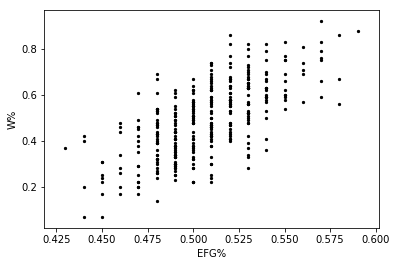

In [61]:
# Effective Field Goal Percentage (eFG%) with wining rate visualization
teamStats.plot(kind='scatter', x='EFG%', y='W%', color='k', marker='.');

Figure Explanation: In this figure, we found that Effective Field Goal Percentage (EFG%) has a general positive relationship with winning rate (W%). As the percentage of effective field goal increases from 42.5% to 60%, the range winning rate has increased from approxiamately bewteen 0%-40% to 50%-90%. From our data visualization, we can read that Effective Field Goal Percentage has positive effect on the winning rate.

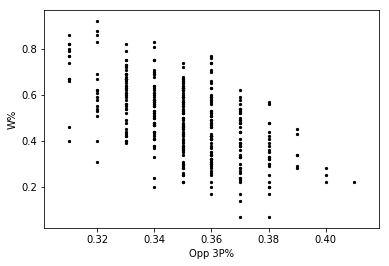

In [62]:
# Opp 3P (Opponents 3 Point Field Goals Made) with winging rate
teamStats.plot(kind='scatter', x='Opp 3P%', y='W%', color='k', marker='.');

Figure Explanation: In this figure, we found that Opponents 3 Point Field Goals Made Percentage (Opp 3P%) has a general negative relationship with winning rate (W%). As the percentage of Opponents 3 Point Field Goals Made increases from 30% to 40%, the range winning rate has decreased from approxiamately bewteen 40%-80% to 0%-20%. From our data visualization, we can read that Opponents 3 Point Field Goals Percentage has positive effect on the winning rate.

#### 2.4.5  Add two more categorial features “Power 6” and “seed”

In [63]:
#Creat team index for both teams in a single game, and build a dataframe to store team index and its name. 
teamStats=teamStats.reset_index()
teamStats.rename(columns={teamStats.columns[0]: "Team"}, inplace=True)
teamStats=teamStats.reset_index()
teamStats['index']=teamStats['index']+1000
teamIndex=teamStats.iloc[:,0:2]
teamIndex2=teamStats.iloc[:,0:2]
teamIndex2.rename(columns={"Team": "awayName"}, inplace=True)
del teamStats['Team']
df1 = pd.merge(df1, teamIndex, on='Team', how='left')
df1.rename(columns={"index": "Homeid"}, inplace=True)
df1 = pd.merge(df1, teamIndex2, on='awayName', how='left')
df1.rename(columns={"index": "Awayid"}, inplace=True)

In [81]:
# Build Power 6 Conference lists to identify whether a team in Power 6.
def checkPower6Conference(team_id):
    teamName = teamIndex[teamIndex['index']==team_id]['Team'].values[0]
    if teamName in listACCteams:
        return 'ACCteams'
    elif teamName in listBig10teams:
        return 'Big10teams'
    elif teamName in listBig12teams:
        return 'Big12teams'
    elif teamName in listSECteams:
        return 'SECteams'
    elif teamName in listPac12teams:
        return 'Pac12teams'
    elif teamName in listBigEastteams:
        return 'BigEastteams'
    else:
        return 'Other'

In [65]:
Power6=[]
for x in teamStats['index'].values:
    Power6.append(checkPower6Conference(x))
teamStats['Power6']=Power6

In [66]:
teamStats = pd.concat([teamStats,pd.get_dummies(teamStats['Power6'])], axis=1)
del teamStats['Power6']

In [67]:
teamStats['ACCteams'].value_counts()

0    337
1     14
Name: ACCteams, dtype: int64

In [70]:
# Due to the different source of getting seed, have to manually adjust this seed feature.
seed = pd.read_csv('2018_seeds.csv',names='r')
a = []
n = 68
for s in seed.r:
    b = []
    b.append(n)
    b.append(s)
    a.append(b)
    n -=1
a = pd.DataFrame(a, columns=['Seed','Team'])
a.Team = [e.lower() for e in a.Team]
a.Team = [e.strip().replace(' ', '-') for e in a.Team]
a = pd.merge(a, teamIndex, on='Team', how='left')
a.rename(columns={'index': 'Team_id'}, inplace=True)

In [69]:
def findTeam(arr):
    for i in range(len(df1)):
        if arr in df1['Team'][i]:
            print(df1['Team'][i])
        else:
            continue

In [71]:
teamStats['Seed'] = None
for i in teamStats.index:
    for j in a.index:
        if teamStats['index'][i] == int(a['Team_id'][j]):
            teamStats['Seed'][i] = a['Seed'][j]
        else:
            continue
teamStats['Seed'] = teamStats['Seed'].fillna(0)

In [72]:
teamStats[teamStats['index'] == 1000].shape[1]

72

In [73]:
# get a team's prepared stat with team ID
def getSeasonData(team_id):
    b = []
    a = teamStats[teamStats['index'] == team_id]
    for i in range(a.shape[1]):
        b.append(a.iloc[0,i])
    return b

### 2.5 Feature Transformation
Our features transformation is the most special method in our project, we used the differences of performance metrics between two teams as our feature and used the categorical variable (whether the team would win) as our final outcome.
* Our X: For each game, the features' differences between two teams' average statistics
* Our Y: whether will win or not (NO=0 or YES=1)

In [74]:
#get the difference between two teams' stats as final features for a game
def compareTwoTeams(id_1, id_2):
    team_1 = getSeasonData(id_1)
    team_2 = getSeasonData(id_2)
    diff = [float(a) - float(b) for a, b in zip(team_1, team_2)]
    diff.pop(0)
    return diff

### 2.6 Modeling Preparation
* Prepared the x, y ready to use assembly models to test features and parameters
* Divide dataset into training and testing dataset

#### 2.6.1 Prepare the x, y and ready to assembly models to test features and parameters

In [75]:
 def getCleansedData(arr):
    x = []
    y = []
    for i in range(len(arr)):
        x.append(compareTwoTeams(arr['Homeid'][i],arr['Awayid'][i]))
        y.append(arr['Win?'])
    return x,y

In [76]:
x,y = getCleansedData(df1)

#### 2.6.2 Divide data to training and testing dataset

* Built updated dataframe using calculated differences as input independent variables X with all the features;
* Built training (75%) and testing data (25%) sets by default

We decide do not do normalization process, because our data is relatively evenly distributed.

In [77]:
x = pd.DataFrame(x,columns=teamStats.columns[1:])

In [78]:
X_prep, X_test, Y_prep, Y_test = train_test_split(x, y[0])

In [79]:
x.head(5)

,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Opp FG,Opp FGA,Opp FG%,Opp 2P,Opp 2PA,Opp 2P%,Opp 3P,Opp 3PA,Opp 3P%,Opp FT,Opp FTA,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,TL,TW,W%,AST%,BLK%,DRB%,ORB%,EFG%,OR100,DR100,SM100,GMSC,MOV,PACE,STL%,TOV%,TRB%,TSA,TPTS,TS%,ACCteams,Big10teams,Big12teams,BigEastteams,Other,Pac12teams,SECteams,Seed
0,-0.83,-1.36,-3.08,0.00,-1.89,-4.02,0.01,0.53,0.93,0.01,-1.57,-3.14,0.05,-1.63,-4.30,-5.92,1.92,0.81,-1.67,-0.76,-3.02,-3.77,1.04,-3.51,0.04,1.59,-2.30,0.07,-0.55,-1.20,-0.02,-3.08,-4.89,0.03,-0.39,-0.75,-1.14,0.70,-0.58,-0.72,1.55,-1.10,-1.56,4.0,-1.0,-0.04,10.94,-3.86,14.63,-2.85,0.01,0.26,2.97,-2.71,-1.01,-2.21,-3.48,0.0,0.00,0.00,-4.47,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.0
1,0.83,1.36,3.08,0.00,1.89,4.02,-0.01,-0.53,-0.93,-0.01,1.57,3.14,-0.05,1.63,4.30,5.92,-1.92,-0.81,1.67,0.76,3.02,3.77,-1.04,3.51,-0.04,-1.59,2.30,-0.07,0.55,1.20,0.02,3.08,4.89,-0.03,0.39,0.75,1.14,-0.70,0.58,0.72,-1.55,1.10,1.56,-4.0,1.0,0.04,-10.94,3.86,-14.63,2.85,-0.01,-0.26,-2.97,2.71,1.01,2.21,3.48,0.0,0.00,0.00,4.47,-0.02,-0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
2,0.66,-0.39,-2.27,0.01,-0.02,-0.73,0.01,-0.37,-1.54,0.01,-0.72,-0.12,-0.02,-0.32,0.38,0.06,-0.18,0.25,0.23,-0.84,-1.54,-1.87,-2.69,-2.33,-0.03,-1.98,-2.32,-0.02,-0.72,-0.01,-0.03,-0.49,-1.81,0.04,-0.72,-1.44,-2.16,-1.52,-0.75,0.41,-0.39,-0.19,-6.59,-8.0,3.0,0.09,0.54,1.09,-7.59,0.26,0.01,1.40,-5.18,6.59,0.95,4.72,-3.04,0.0,-0.01,0.00,-2.32,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,-0.66,0.39,2.27,-0.01,0.02,0.73,-0.01,0.37,1.54,-0.01,0.72,0.12,0.02,0.32,-0.38,-0.06,0.18,-0.25,-0.23,0.84,1.54,1.87,2.69,2.33,0.03,1.98,2.32,0.02,0.72,0.01,0.03,0.49,1.81,-0.04,0.72,1.44,2.16,1.52,0.75,-0.41,0.39,0.19,6.59,8.0,-3.0,-0.09,-0.54,-1.09,7.59,-0.26,-0.01,-1.40,5.18,-6.59,-0.95,-4.72,3.04,0.0,0.01,0.00,2.32,-0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0
4,1.84,-4.53,-2.21,-0.06,-6.56,-8.14,-0.07,2.03,5.94,-0.01,-2.06,-1.77,-0.06,-0.84,-0.29,-1.14,-0.62,0.58,1.44,-0.46,0.32,-9.10,-2.52,-1.51,-0.04,-2.34,-1.47,-0.05,-0.18,-0.04,-0.01,0.32,-0.24,0.02,0.67,3.32,3.99,-0.11,-0.32,-0.15,-0.40,-0.80,-4.91,3.0,1.0,-0.02,11.23,4.48,7.62,-5.01,-0.04,-8.89,-3.22,-5.66,-8.67,-4.19,-3.30,0.0,0.00,-0.01,-2.99,-0.08,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Data Analysis

In the data analysis, we firslty used Random Forest to check feature significance and stepwise feature selection and we found that Total Win (TW) is the most important feature to our predictions and all 71 features contribute more or less to the model. After selecting our features, we used grid search to tune the parameters for our 4 models included Logistic regression, linear SVC, GradientBoosting and BayesianRidge and tested the accuracy based on out of sample data from which we find they all have performace from 67% to 72%. After these four models, we also tried Neural Network and get accuracy scores near 71%. We then used these 5 models to implement voting strategy and used simulation to get our 64 final prediction result. We are excited to get the Final Champion Villanova predicted correctly!

* Check general features significance based on Random Forest
* Try stepwise feature selection based on Random Forest Model
* Use grid search to tune the parameters for following 4 models
    * Logistic regression Model
    * Linear SVC Model
    * GradientBoosting Model
    * BayesianRidge Model
* Testing model accuarcy on testing dataset
* Use Neural Network as our fifth model
* Using voting strategy assembling 5 models above
* Simulate Tournament

### 3.1 Check general features significance based on Random Forest

In [330]:
model2 = RandomForestClassifier(n_estimators=64)
model2.fit(X_prep,Y_prep)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

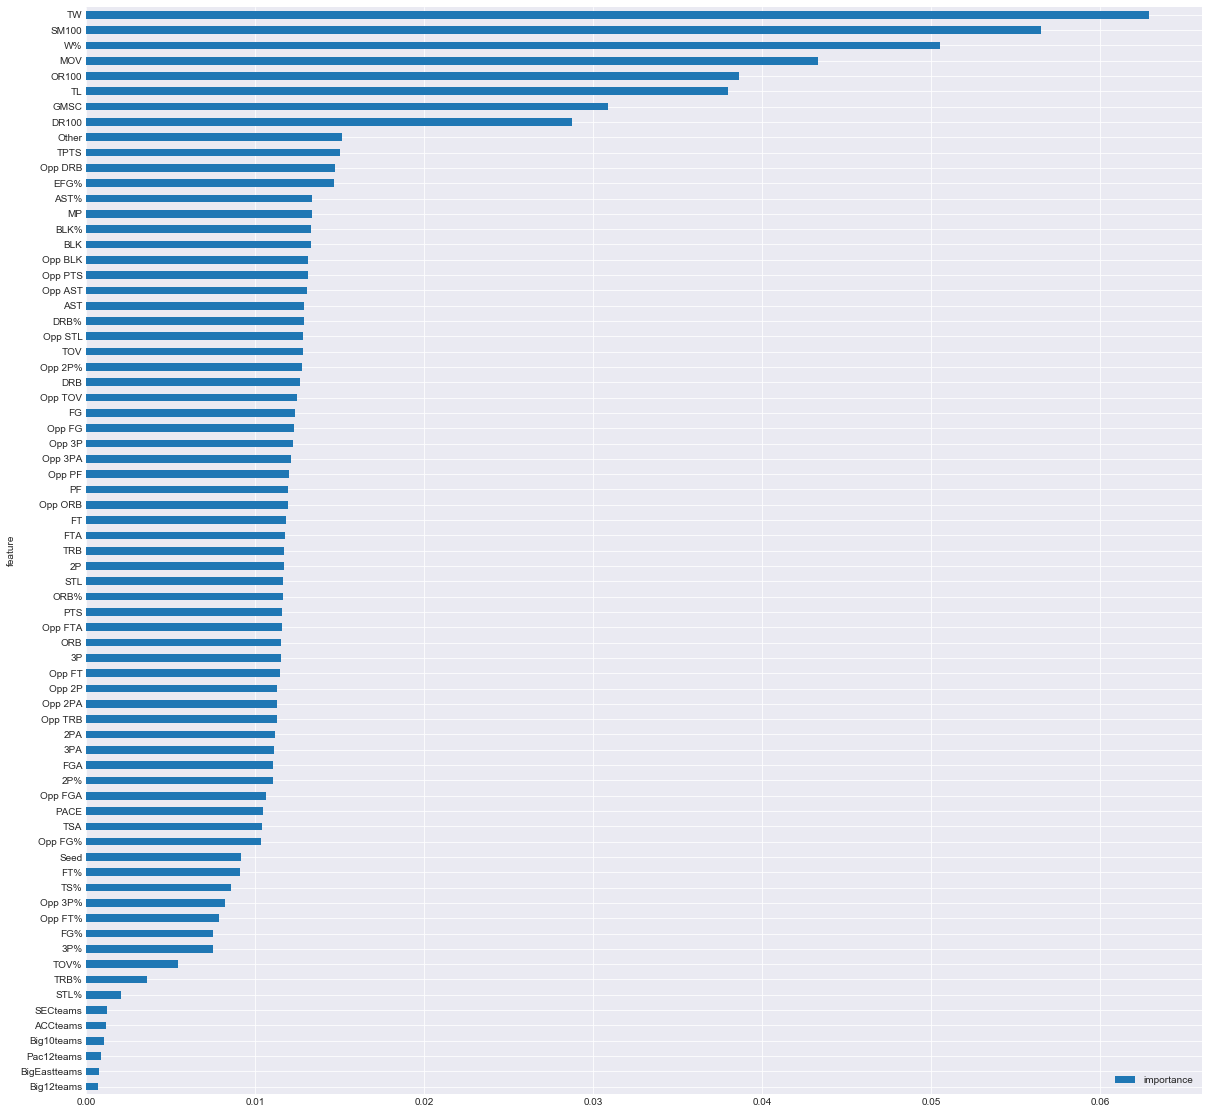

In [332]:
sns.set_style('darkgrid')
features = pd.DataFrame()
features['feature'] = x.columns
features['importance'] = model2.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

Explanation: From this figure, we can see that top five important features to our results are: Total Win (TW), Score Margin per 100 Possessions(SM100), Winning Rate(W%), Offensive Rate per 100 Possessions (OR100), and Total Loss (TL). They all have importance over 0.35 to our final prediction. The last five features are the categorical features we added which they have lower than 0.005 importance impact. This figure can at least tell us the comparative importance among all our features, but we still need a clearer picture of which features would be better for our models. Therefore, in order to determine which feature should we keep or remove, we performed stepwise feature selections using our random forest model below.

### 3.2 Try stepwise features selection based on Random Forest Model

Optimal number of features : 70


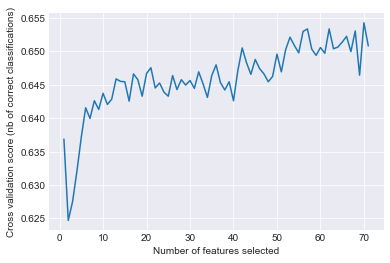

In [356]:
rfecv = RFECV(estimator=model2, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(X_prep,Y_prep)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
sns.set_style('darkgrid')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Explanation: From this figure, we can see that we have 71 variables in total, and the best combination of features predicted by our model is 70. However, when the number of features are improving from 70 to 71, the accuracy score from cross validation was dropping from nearly 65.5% to 65.2%. However, we think it's only a small deduction in our accuarcy score, so we decided to keep all 71 features. In addition, since the feature selection process takes a long time to run in our system, we had limited time to only run stepwise feature selection using random forest to try test if there's any necessary features we should remove.

### 3.3 Use grid serach to tune the parameters for each model
* We did parameter tuning because it's an importnat process in machine learning to selecting the values for a model’s parameters that maximize the accuracy of the model.

In [337]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [338]:
# logistic regression
model1 = linear_model.LogisticRegression()
model1_params = {'penalty':['l1','l2']}
model1_grid = GridSearchCV(estimator=model1, param_grid=model1_params, scoring='accuracy', cv=5, n_jobs=4)
%time model1_grid.fit(X_prep, Y_prep)

Wall time: 13.3 s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [339]:
print(model1_grid.best_score_)
print(model1_grid.best_params_)

0.7173295454545454
{'penalty': 'l1'}


In [340]:
# Linear Support Vector Classification
model3 = LinearSVC()
model3_params = {'C':[1,0.5,0.1]}
model3_grid = GridSearchCV(estimator=model3, param_grid=model3_params, scoring='accuracy', cv=5, n_jobs=4)
%time model3_grid.fit(X_prep, Y_prep)

Wall time: 37.7 s


GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': [1, 0.5, 0.1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [341]:
print(model3_grid.best_score_)
print(model3_grid.best_params_)

0.7147356719367589
{'C': 0.1}


In [342]:
# GradientBoostingClassifier
model6 = GradientBoostingClassifier()
model6_params = {"loss" : ['deviance','exponential'],'n_estimators':[100,200],'max_depth':[3,5,8],'max_features':['sqrt','auto','log2']}
model6_grid = GridSearchCV(estimator=model6, param_grid=model6_params, scoring='accuracy', cv=3, n_jobs=4)
%time model6_grid.fit(X_prep, Y_prep)

Wall time: 4min 26s


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_features': ['sqrt', 'auto', 'log2'], 'max_depth': [3, 5, 8], 'loss': ['deviance', 'exponential'], 'n_estimators': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [343]:
print(model6_grid.best_score_)
print(model6_grid.best_params_)

0.7132534584980237
{'n_estimators': 100, 'max_features': 'auto', 'loss': 'exponential', 'max_depth': 3}


In [84]:
# Assembling models based on the best parameters conmibination of grid search
model1 = linear_model.LogisticRegression(penalty='l2')
model3 = LinearSVC(C= 0.1)
model6 = GradientBoostingClassifier(n_estimators=100, max_depth=8, max_features='log2', loss='deviance')
# BayesianRidge does not have too much parameters to tune
model10 = linear_model.BayesianRidge()

### 3.4 Testing model accuarcy on testing dataset (Out of Sample Dataset)

In [347]:
def test_set_accu(clf):
    clf.fit(X_prep, Y_prep)
    result=clf.predict(X_test)
    result[result < .5] = 0
    result[result >= .5] = 1
    accuracy=0
    for t, x in enumerate(Y_test):
        if x == result[t]:
            accuracy +=1
    print("The modle accuracy is " + str(accuracy/len(result)))

In [349]:
test_set_accu(model1)

The modle accuracy is 0.719155242682475


In [350]:
test_set_accu(model3)

The modle accuracy is 0.7213782882549092


In [351]:
test_set_accu(model6)

The modle accuracy is 0.6739533160429789


In [352]:
test_set_accu(model10)

The modle accuracy is 0.7167469433123379


### 3.5 Use Neural Network as our fifth model

In [345]:
labels = to_categorical(np.asarray(Y_prep))
adam=Adam()
# Assembling MLP
model = Sequential()
model.add(Dense(48, input_shape=(71,), activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(labels.shape[1], activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 48)                3456      
_________________________________________________________________
dropout_1 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 98        
Total params: 3,554
Trainable params: 3,554
Non-trainable params: 0
_________________________________________________________________


In [346]:
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_prep,labels,nb_epoch=20,batch_size=6)

C:\Users\nathan\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
16192/16192 [==============================] - 3s 193us/step - loss: 0.6701 - acc: 0.6734
Epoch 2/20
16192/16192 [==============================] - 3s 162us/step - loss: 0.5683 - acc: 0.7055
Epoch 3/20
16192/16192 [==============================] - 3s 176us/step - loss: 0.5594 - acc: 0.7115
Epoch 4/20
16192/16192 [==============================] - 3s 164us/step - loss: 0.5574 - acc: 0.7109
Epoch 5/20
16192/16192 [==============================] - 3s 170us/step - loss: 0.5554 - acc: 0.7104
Epoch 6/20
16192/16192 [==============================] - 3s 162us/step - loss: 0.5531 - acc: 0.7145
Epoch 7/20
16192/16192 [==============================] - 3s 173us/step - loss: 0.5538 - acc: 0.7133
Epoch 8/20
16192/16192 [==============================] - 3s 165us/step - loss: 0.5538 - acc: 0.7150
Epoch 9/20
16192/16192 [==============================] - 3s 176us/step - loss: 0.5526 - acc: 0.7143
Epoch 10/20
16192/16192 [==============================] - 3s 163us/step - loss: 0.5518 - a

In [348]:
# neural network accuracy
testlabels = to_categorical(np.asarray(Y_test))
loss,accuracy=model.evaluate(X_test,testlabels)
print('\nloss: ',loss)
print('\naccuracy: ',accuracy)

5398/5398 [==============================] - 0s 24us/step

loss:  0.5496934108400221

accuracy:  0.7132271211338997


### 3.6 Using voting strategy assembling 4 models and Neural Network Model

* Because all models above have good performance, we will predict team result using voting strategy for all five models including nerual network. 

In [353]:
def predictTwoTeams(team1_name,team2_name):
    team1_id = teamIndex[teamIndex['Team']==team1_name].values[0][0]
    team2_id = teamIndex[teamIndex['Team']==team2_name].values[0][0]
    
    ## voting 
    predResult1 = model1.predict([compareTwoTeams(team1_id,team2_id)])
    predResult3 = model3.predict([compareTwoTeams(team1_id,team2_id)])
    predResult6 = model6.predict([compareTwoTeams(team1_id,team2_id)])
    predResult10 = model10.predict([compareTwoTeams(team1_id,team2_id)])
    predResult_n = model.predict(np.array([compareTwoTeams(team1_id,team2_id)]))
    
    if (predResult1[0]+predResult3[0]+predResult6[0]+predResult10[0]+predResult_n[0][1])/5 >= 0.5:
        return team1_name
    else:
        return team2_name

### 3.7 Simulate Tournament

In [354]:
def simulate_tournament(south=south,west=west,east=east,midwest=midwest):
    first_round_win=[]
    def single_match(area):
        for i in range(0,15,2):
            a = area[i].lower()
            b = area[i+1].lower()
            c = predictTwoTeams(a,b)
            first_round_win.append(c)
            print(a+' VS '+b+' : '+c+' win!!!')
    print('First Round: 64 >>> 32')
    print('south')
    single_match(south) 
    print('\n')
    print('west') 
    single_match(west)
    print('\n')
    print('east') 
    single_match(east)
    print('\n')
    print('midwest')  
    single_match(midwest) 
    second_round_win=[]
    def second_round(area):
        for i in range(0,31,2):
            a = area[i].lower()
            b = area[i+1].lower()
            c = predictTwoTeams(a,b)
            second_round_win.append(c)
            print(a+' VS '+b+' : '+c+' win!!!')
    print('\n')
    print('second round 32>>>16')
    second_round(first_round_win)
    print('\n')
    third_round_win=[]
    def third_round(area):
        for i in range(0,15,2):
            a = area[i].lower()
            b = area[i+1].lower()
            c = predictTwoTeams(a,b)
            third_round_win.append(c)
            print(a+' VS '+b+' : '+c+' win!!!')
    print('\n')
    print('third round 16>>>8')
    third_round(second_round_win)
    finalFour=[]
    def final4(area):
        for i in range(0,7,2):
            a = area[i].lower()
            b = area[i+1].lower()
            c = predictTwoTeams(a,b)
            finalFour.append(c)
            print(a+' VS '+b+' : '+c+' win!!!')
    print('\n')
    print('final four 8>>>4')
    final4(third_round_win)
    print('\n')
    semifinals=[]
    def final2(area):
        for i in range(0,3,2):
            a = area[i].lower()
            b = area[i+1].lower()
            c = predictTwoTeams(a,b)
            semifinals.append(c)
            print(a+' VS '+b+' : '+c+' win!!!')
    print('\n')
    print('semifinals 4>>>2')
    final2(finalFour)
    print('\n')
    print('Championship!!!!!')
    print('Congratulation!!!! '+predictTwoTeams(semifinals[0],semifinals[1]))

In [355]:
simulate_tournament()

First Round: 64 >>> 32
south
virginia VS maryland-baltimore-county : virginia win!!!
creighton VS kansas-state : kansas-state win!!!
kentucky VS davidson : kentucky win!!!
arizona VS buffalo : arizona win!!!
miami-fl VS loyola-il : miami-fl win!!!
tennessee VS wright-state : tennessee win!!!
nevada VS texas : nevada win!!!
cincinnati VS georgia-state : cincinnati win!!!


west
xavier VS texas-southern : xavier win!!!
missouri VS florida-state : florida-state win!!!
ohio-state VS south-dakota-state : ohio-state win!!!
gonzaga VS north-carolina-greensboro : gonzaga win!!!
houston VS san-diego-state : houston win!!!
michigan VS montana : michigan win!!!
texas-am VS providence : providence win!!!
north-carolina-state VS lipscomb : north-carolina-state win!!!


east
villanova VS radford : villanova win!!!
virginia-tech VS alabama : virginia-tech win!!!
west-virginia VS murray-state : west-virginia win!!!
wichita-state VS marshall : wichita-state win!!!
florida VS st-bonaventure : florida wi

## 4. Conclusion

From the very first project proposal till now, we have developed full set of process to achieve our final objective of predicting final results in 2018 NCAA. We have taken the feedback from our Project Proposal and Project Update progress and here are the changes we have made:
* We combined 2017 & 2018 data together for both Team and Player Statistics
* We ran a simulation result to predict all final 64 team results rathen than comparing two teams' winning rate to get a clearer picture of final results
* We dropped Player Statitics because it's not helpful in predicting final teams
* We tested our model accuracies based on out of sample
* We changed majority of for-loops into functions to help readers better understand our thoughts
* We have learned to use grid search to tune our paramaters to maximize the accuracy of our models
* We added visualizations in our data processing and data modeling step to tell our story better
* We decided not to normalize all of our data because they are evenly distributed

In the process of developing the final function, we followed the following procedure: Firstly, we imported team information dataset from Merkel and did data cleaning including dropping inactive teams, matching teams with gameid, dropping useless columns, and finalized the dataframe (TeamMean) grouped by team names as the data preparation for the following steps; 

After cleaning the data, we firstly added numeric features to two dataframes (addon and teamMetric) derived from current features, then combined these two dataframes with our former cleaned dataframe (TeamMean). Then we added two categorical features (Power6 and Seed) based on the normalized dataframe (teamStats). After this step, we’re interested in testing the usefulness of our features of a random model, to see if we can improve our accuracy score by leaving out some lower-ranked features. We firstly imported all our features and their corresponding importance into a dataframe, and generate a sorted importance ranking using our random forest in order to see which features should we keep or leave out in order to improve our final model, however we found when we left out some of the variables with low significance score, our model accuracy dropped, so we decided to keep all current features;

After feature selections, we created training (75%) and testing dataset (25%) and used 4 models (Logistic regression, linear SVC, Gradient Boosting and Bayesian Ridge models) in total to test them on the testing datasets and found that they all have decent performance at around 70% accuracy testing on our out of sample. So we select all 4  models along with Neural Network model which has an accuray near 71.3% to prepare them in our model stacking step using voting strategy between these 5 models to make final predictions.

In the final step, we used our model assembling methods to give the simulation results of all 64 teams in final with an accuracy about 65% and our predicted final champion turned out to be the real champion in past March NCAA basketball tournament. We are so happy to see our final precition Villanova was the actual winning team in past March! 

From this project, we have learned the importance of the diversity of data sources, the clarity of datasets after cleaning, the variety of features in the model, and the model ensembling method using high accuracy models. We cannot achieve our goal without learning Python combined with machine learning methods. 

Thank you professor for teaching us so many useful methods to help us achieve our goals in the project, we would still work harder in the future to learn more about Python!


## 5. Citation

* “Glossary.” Basketball-Reference.com, www.basketball-reference.com/about/glossary.html#mp.
* “NCAA March Madness.” NCAA.com, www.ncaa.com/march-madness.
*  Fox, Austin. “College Basketball: Ranking the Power 6 Conferences.” Bleacher Report, Bleacher Report, 12 Apr. 2017, bleacherreport.com/articles/1474319-college-basketball-ranking-the-power-6-conferences#slide6.
